# Credit Card Default Prediction
This notebook explores and cleans the dataset, performs feature engineering, and prepares data for modeling.


In [24]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, root_mean_squared_error

# let the notebook know where to find the data
os.chdir("C:/Users/benla/Desktop/store_sales_forecasting")



In [25]:
# first we will load the data
df_train = pd.read_csv("data/raw/train.csv", header=0)

# check out the shape and head of the dataframe
print(f"df_train shape: {df_train.shape}")
print(f"df_train head:\n{df_train.head()}")

df_train shape: (3000888, 6)
df_train head:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0


The next step is to perform EDA on the data

In [26]:
# # check to see that there are no missing values
# print(f"missing values:\n{df_train.isnull().sum()}")


# # checking to see the general behavior of the data
# df_train.info()
# df_train.describe()


# # additional information to understand the dataset
# print('unique store numbers')
# print(df_train['store_nbr'].nunique())

# print('unique families')
# print(df_train['family'].nunique())

# print('sales averages')
# print(df_train['sales'].sum())

# print('unique dates')
# print(df_train['date'].nunique())



# df_train['date'] = pd.to_datetime(df_train['date']) # format it to the right date 
# daily_sales = df_train.groupby('date')['sales'].sum()
# daily_sales.plot(title='total sales over time') # the plot shows a relatively upward trending sales trajectory

# # see how often items get sold in general, and how often items in each family get sold.
# (df_train['sales'] == 0).mean()

# df_train.groupby('family')['sales'].apply(lambda x: (x==0).mean()).sort_values() # so it seems that there are a lot of categories that customers buy frequently and some that are not bought frequently at all


Model accuracy: 0.76
Train accuracy: 0.73
Test accuracy: 0.76
MAE: 246.59
357.77574911261894
RMSE: 663.49
R²: 0.76


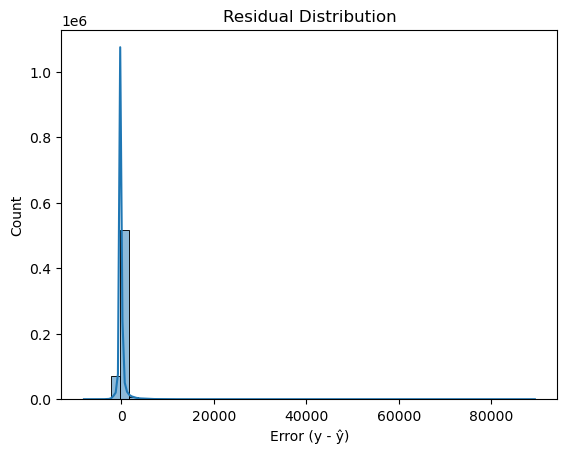

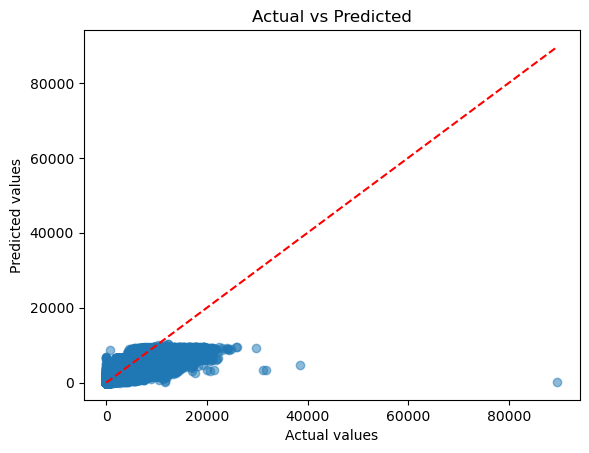

In [ ]:
# after the initial basic EDA we will make a baseline model to see how well it can fit the data
features = (col for col in df_train.columns if col not in ['sales', 'date', 'id'])
x = df_train[features]
x = pd.get_dummies(x, columns=['family'], drop_first=True)
y = df_train['sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=305, shuffle=False)

# now make a model

model = XGBRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=305
)



model.fit(x_train, y_train)

# 🔹 5. Make predictions and evaluate
y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

# once we have the model, we now want to evaluate it
train_acc = model.score(x_train, y_train)
test_acc = model.score(x_test, y_test)
print(f"Train accuracy: {train_acc:.2f}")
print(f"Test accuracy: {test_acc:.2f}")


# now move on to model evaluation
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}") # this is very large, given that the average sales is around 360
print(f"RMSE: {rmse:.2f}") # this is also large, which means we are getting lots of large errors
print(f"R²: {r2:.2f}")

residuals = y_test - y_pred
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Error (y - ŷ)")
plt.show()

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# in conclusion, it seems that the variance in values of the data is very high, making MAE very large.
# Additionally, RMSE is also very large, meaning that there are many outliers
# on way of potentially combating this would be to log the sales values.
# we should also experiment with adding more features to the model, and making other models as well.


# NEXT TIME DO RESEARCH ON THE DIFFERENT WAYS WE EVALUTATE MODELS LIKE ROC CURVES ETC.

# probably should add average store sales to the feature list

# how do i figure out which features should be added, given the context? is there something like a set checklist that can let me know if i am missing features?

# should I be adding the features first, or should i be making a really simple model first and then adding features later? how would i go about doing that? should i like add one feature at at ime, or add a bunch?

# how do i know which features are important? how do i know which features can be ignored/taken out?

# is the list of features that I should have changing with every model?
